# Análise exploratória de dados

In [1]:
import pandas as pd
from IPython.display import display, Markdown
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## 1. Leitura dos dados

In [2]:
df = pd.read_csv('../data/raw/data.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## 2. Descrição dos dados

Os dados se referem a gorjetas recebidas por um garçom em um período de alguns meses enquanto trabalhava em um restaurante. Esse experimento foi estudado no livro  Practical Data Analysis: Case Studies in Business Statistics, escrito por Peter G. Bryant e Marlene A. Smith.

Considerando a natureza dos dados faremos análises baseadas nos valores relativos das gorjetas em relação a conta da mesa. Isso porque, culturalmente, o valor da gorjeta costuma ser proporcional ao valor da conta.

### 2.1 Dicionário de dados

In [3]:
dicionario = pd.read_csv('../data/external/dictionary.csv')
dicionario

,variavel,descricao,tipo,subtipo
0,total_bill,valor da conta,quantitativa,contínua
1,tip,Valor da gorjeta,quantitativa,contínua
2,sex,Sexo do indivíduo,qualitativa,nominal
3,smoker,Se havia algum fumante na mesa,qualitativa,nominal
4,day,Dia da semana,qualitativa,ordinal
5,time,período do dia,qualitativa,ordinal
6,size,Quantidade de pessoas à mesa,quantitativa,discreta


Temos então um total de 7 variáveis. 4 qualitativas (sendo dessas 2 nominais e 2 ordinais) e 3 quantitativas (2 contínuas e 1 discreta).

### 2.2 Valores faltantes

In [4]:
#contaremos a quantidade de valores nulos por coluna

null_counts = df.isnull().sum()

print(null_counts)

display(Markdown(
    "---\n"
    f"Sabemos assim que a não existem valores faltantes."))


total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


---
Sabemos assim que a não existem valores faltantes.

## 3. Perguntas de partida e hipóteses

- A quantidade de pessoas à mesa influenciou os valores de gorjeta?
- O período do dia influenciou os valores?
- Qual porcentagem média de gorjeta em relação ao valor da conta?
- Como o dia da semana afetou os valores? Finais de semana causam variações?
- Homens e mulheres costumam dar gorjetas em valores diferentes?

## 4. Análises

Vamos criar uma nova coluna com o valor percentual da gorjeta em relação a conta.

In [5]:
df['percent_tip'] = (df['tip'] / df['total_bill']) * 100
df.head()

,total_bill,tip,sex,smoker,day,time,size,percent_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


Identificaremos estatísticas descritivas do nosso conjunto de dados que nos ajudarão nas análises:

In [6]:
df.describe(include='all')

,total_bill,tip,sex,smoker,day,time,size,percent_tip
count,244.000000,244.000000,244,244,244,244,244.000000,244.000000
unique,NaN,NaN,2,2,4,2,NaN,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN,NaN
freq,NaN,NaN,157,151,87,176,NaN,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672,16.080258
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100,6.107220
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000,3.563814
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000,12.912736
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000,15.476977
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000,19.147549


- A maioria das gorjetas foram durante o jantar
- 64% das gorjetas foram ofertadas por homens
- 61% das gorjetas foram ofertadas por não fumantes
- A média do valor percentual de gorjeta em relação a conta foi de 16%
- O maior valor bruto de gorjeta foi de U$ 10
- A maior valor percentual de gorjeta foi de 71% do valor da conta

## 4.1 Vamos visualizar a distribuição das variáveis quantitativas:

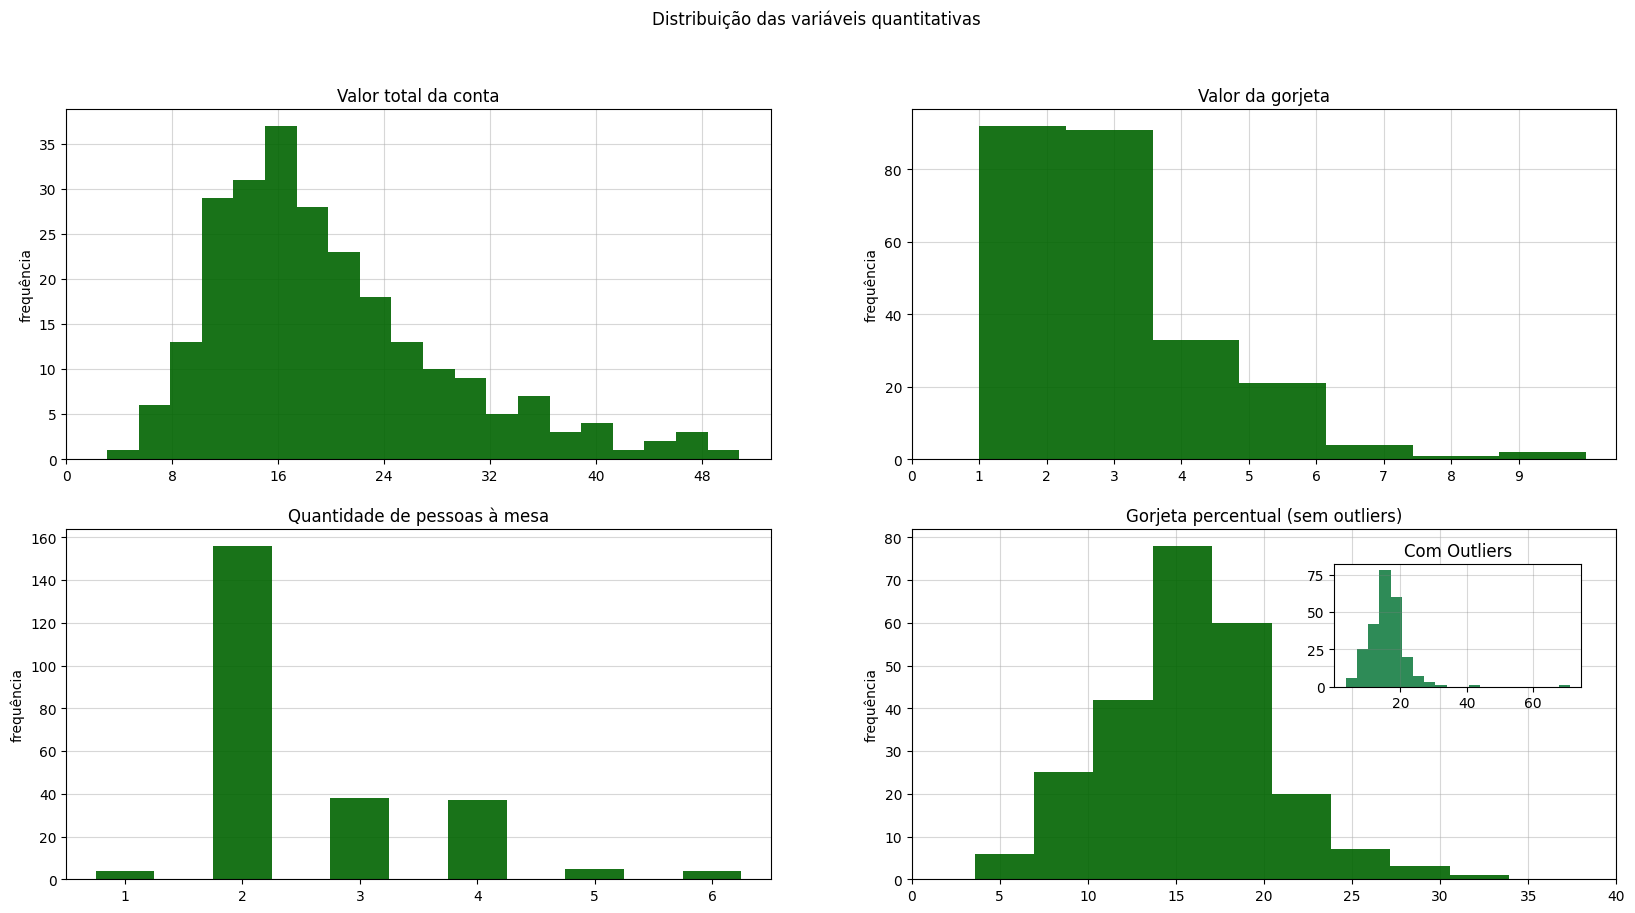

In [7]:
fig, axes = plt.subplots(2,2,figsize=(20, 10))
fig.suptitle('Distribuição das variáveis quantitativas')

# Gráfico da variável total_bill

ax = df['total_bill'].hist(bins=20, ax=axes[0,0],zorder=2,alpha=0.9,color='darkgreen')
min = ax.get_xlim()[0]
max = ax.get_xlim()[1]
tick_interval = np.ceil((max - min) / 7)
ax.set_xticks(np.arange(int(min), int(max) , int(tick_interval)))
ax.set_title('Valor total da conta')
ax.set_ylabel('frequência')
ax.grid(True, which='both', axis='both', alpha=0.5,zorder=1) # Suaviza as linhas de grade

# Gráfico da variável tip

ax = df['tip'].hist(bins=7,ax=axes[0,1],zorder=2,alpha=0.9,color='darkgreen')
min = ax.get_xlim()[0]
max = ax.get_xlim()[1]
tick_interval = np.ceil((max - min) / 10)
ax.set_xticks(np.arange(int(min), int(max) , int(tick_interval)))
ax.set_title('Valor da gorjeta')
ax.set_ylabel('frequência')
ax.grid(True, which='both', axis='both', alpha=0.5,zorder=1)

# Gráfico da variável size

ax = df['size'].value_counts().sort_index().plot(kind='bar', ax=axes[1, 0],zorder=2,alpha=0.9,color='darkgreen')
ax.set_title('Quantidade de pessoas à mesa')
ax.set_ylabel('frequência')
ax.set_xlabel('')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0) #tirando a inconveniente rotação dos valores
ax.grid(True, which='both', axis='y',alpha=0.5,zorder=1)

# Gráfico da variável tip_percent

ax = df['percent_tip'].hist(bins=20,ax=axes[1,1],zorder=2,alpha=0.9,color='darkgreen')
ax.set_title('Gorjeta percentual (sem outliers)')
ax.set_ylabel('frequência')
ax.grid(True, which='both', axis='both', alpha=0.5,zorder=1)
ax.set_xlim(left=0, right=40) #Criando limites do eixo x para elimitar ouliers

#colocando inset para mostrar visualização com ouliers
inset_ax = ax.inset_axes([0.6, 0.55, 0.35, 0.35])
inset_ax.hist(df['percent_tip'], bins=20, color='seagreen')
inset_ax.set_title('Com Outliers')
inset_ax.grid(True, which='both', axis='both', color='gray', alpha=0.3)

plt.show()

Observamos através dos gráficos que:

- A grande maioria das mesas era composta por duas pessoas;

- A maioria das contas das mesas girou em torno de U$ 16;

- A maioria das gorjetas foram 1 a 4 dólares e corresponderam a 13% a 20% do valor da conta.

## 4.2 Distruibuição das variáveis qualitativas

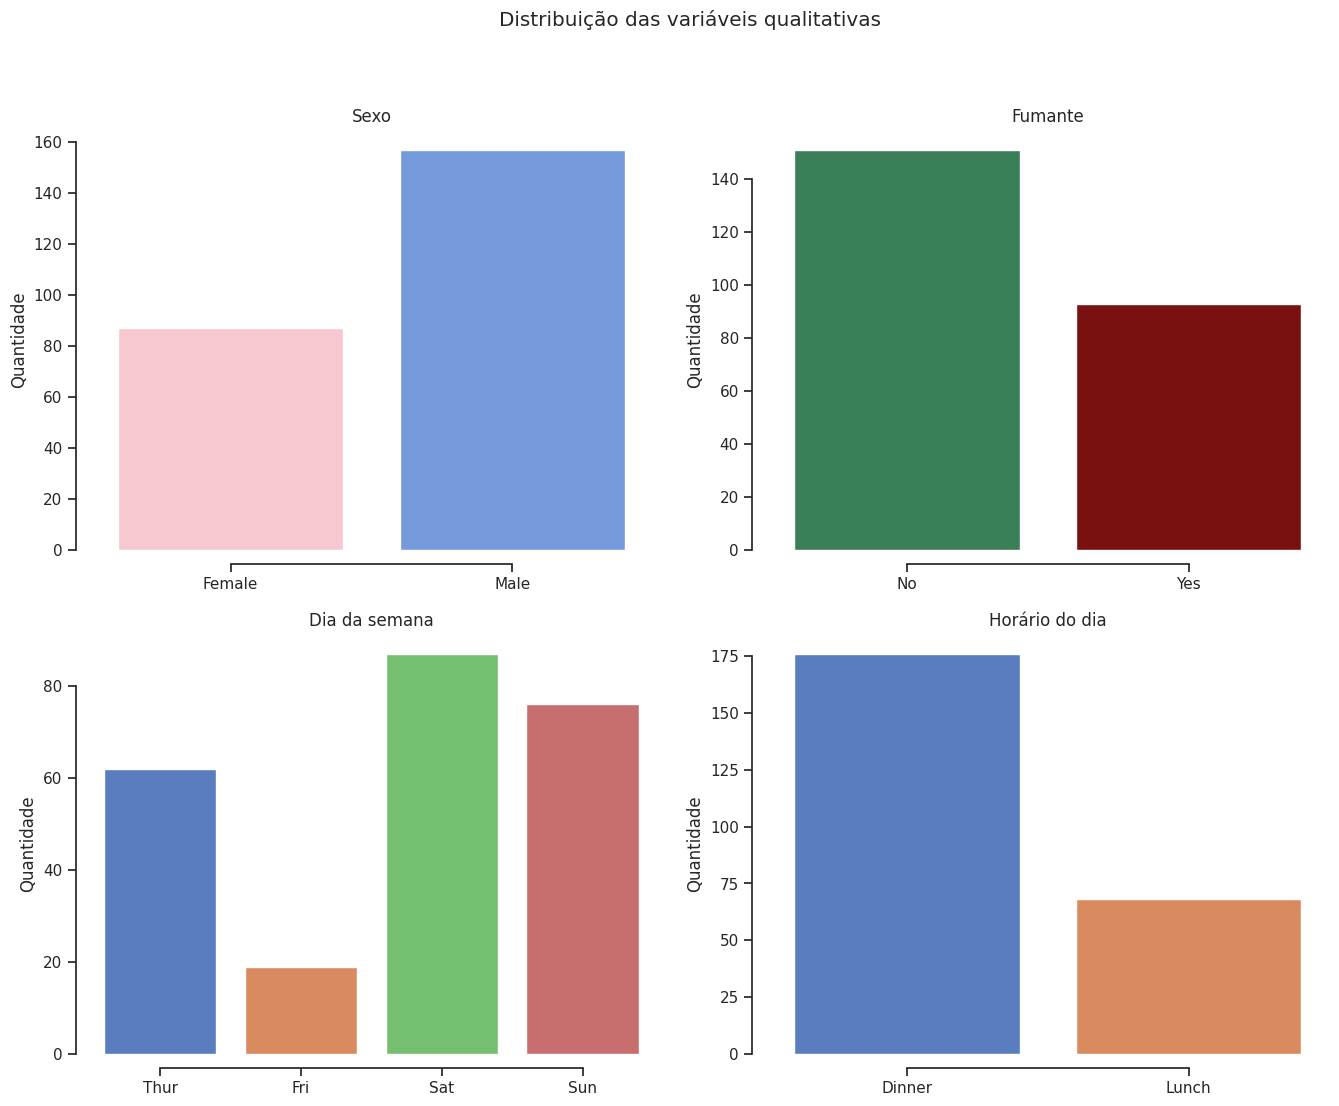

In [15]:
sns.set_style('ticks') #configura o estilo do fundo para uma visualização mais limpa

fig, axes = plt.subplots(2,2,figsize=(16, 12)) #define 4 subplots e o tamanho da figura
fig.suptitle('Distribuição das variáveis qualitativas')

#Cria dicionário para as cores que serão usadas
pal_gen = dict(Female='pink', Male='cornflowerblue')
pal_smoker = dict(No='seagreen', Yes='darkred')
pal_time = dict(Dinner='darkgreen', Lunch='darkblue')
pal_day = sns.color_palette("muted", len(df['day'].unique()))

ordem = ['Thur', 'Fri', 'Sat', 'Sun'] #cria uma ordem para os dias da semana

#Gráfico para variável sex
sns.countplot(x='sex',data=df, palette=pal_gen, ax=axes[0,0])
axes[0,0].set_title('Sexo')
axes[0,0].set_xlabel('')
axes[0,0].set_ylabel('Quantidade')

#Gráfico para variável smoker
sns.countplot(x='smoker',data=df, palette=pal_smoker, ax=axes[0,1])
axes[0,1].set_title('Fumante')
axes[0,1].set_xlabel('')
axes[0,1].set_ylabel('Quantidade')

#Gráfico para variável day
sns.countplot(x='day',data=df, palette=pal_day,order=ordem, ax=axes[1,0])
axes[1,0].set_title('Dia da semana')
axes[1,0].set_xlabel('')
axes[1,0].set_ylabel('Quantidade')

#Gráfico para variável time
sns.countplot(x='time',data=df, palette=pal_day, ax=axes[1,1])
axes[1,1].set_title('Horário do dia')
axes[1,1].set_xlabel('')
axes[1,1].set_ylabel('Quantidade')


sns.despine(offset=10, trim=True) #remove as caixas


plt.show()


###Observamos que:

- Sexta-feira é o dia em que o garçom recebe menos gorjetas, provavelmente o dia de menos movimento no restaurante. Sábado é o dia mais movimentado;
- O restaurante é muito mais movimento durante o jantar que durante o almoço;
- A maioria das pessoas que ofereceram gorjetas são homens, como havíamos observado anteriormente;
- Não fumantes são a maioria.

## 4.3 Análises bivariadas

### Vamos analisar o comportamento de uma variável em função de outra.

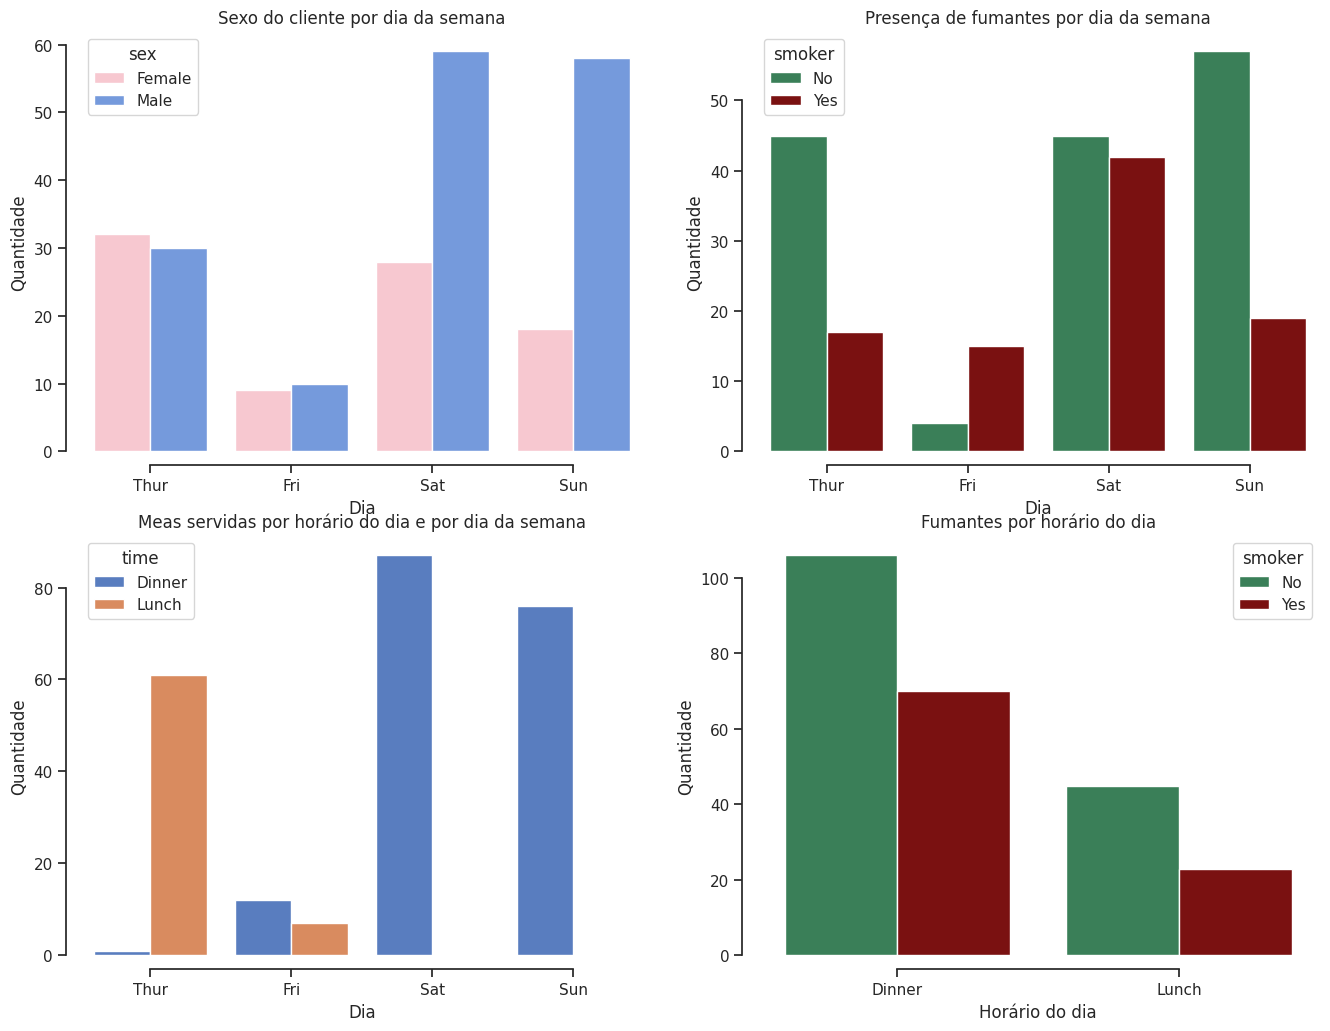

In [16]:
sns.set(style="ticks") #configura o estilo do fundo para uma visualização mais limpa

fig, axes = plt.subplots(2, 2, figsize=(16, 12)) #define 4 subplots e o tamanho da figura

#Gráfico para análise por dia e por sexo
sns.countplot(x='day', hue='sex', data=df, palette=pal_gen, order=ordem, ax=axes[0,0])
axes[0,0].set_title('Sexo do cliente por dia da semana')
axes[0,0].set_xlabel('Dia')
axes[0,0].set_ylabel('Quantidade')

#Gráfico para análise por horário do dia e por presença de fumantes
sns.countplot(x='time', hue='smoker', data=df, palette=pal_smoker, ax=axes[1,1])
axes[1,1].set_title('Fumantes por horário do dia')
axes[1,1].set_xlabel('Horário do dia')
axes[1,1].set_ylabel('Quantidade')

#Gráfico para análise por dia e por presença de fumantes
sns.countplot(x='day', hue='smoker', data=df, palette=pal_smoker, order=ordem, ax=axes[0,1])
axes[0,1].set_title('Presença de fumantes por dia da semana')
axes[0,1].set_xlabel('Dia')
axes[0,1].set_ylabel('Quantidade')

#Gráfico para análise por dia e por horário
sns.countplot(x='day', hue='time', data=df, palette=pal_day, order=ordem, ax=axes[1,0])
axes[1,0].set_title('Meas servidas por horário do dia e por dia da semana')
axes[1,0].set_xlabel('Dia')
axes[1,0].set_ylabel('Quantidade')

sns.despine(offset=10, trim=True) #remove as caixas

### Observações:

- A quantidade de homens e mulheres a pagar a conta é equilibrada durante as quintas e sextas, porém nos sábados e domingos o número de homens a pagar a conta é muito maior que o de mulheres;

- A proporção de fumantes ou não fumantes parece não mudar a depender do horário do dia;

- O número de não fumantes supera os de fumantes em quase todos os dias, com grandes diferenças nas quintas e nos domingos. Nas sextas, entretanto, o número de fumantes é maior;

- Nas quintas o restaurante é majoritariamente frequentado durante o almoço, enquanto nas sextas jantar é mais frequente. A ausência de dados de almoço nos sábados e domingos sugere que o restaurante não abre para almoço nesses dias.

## 4.3 Boxplots de algumas variáveis

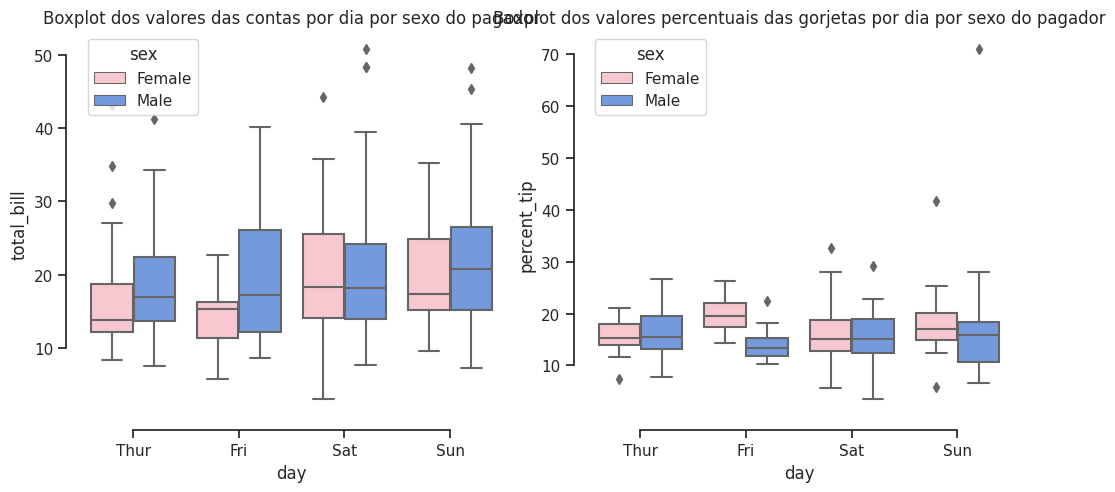

In [9]:
sns.set(style="ticks") #configura o estilo do fundo para uma visualização mais limpa

fig, axes = plt.subplots(1, 2, figsize=(12, 5)) #define 2 subplots e o tamanho da figura


#Boxplot dos valores das contas por dia por sexo do pagador
sns.boxplot(x="day",y="total_bill" ,hue="sex",data=df, palette=pal_gen,order=ordem, ax=axes[0]) #cria boxplot
axes[0].set_title('Boxplot dos valores das contas por dia por sexo do pagador') #adiciona título

#Boxplot dos valores dos valores percentuais das gorjetas por dia por sexo do pagador
sns.boxplot(x="day",y="percent_tip" ,hue="sex",data=df, palette=pal_gen,order=ordem, ax=axes[1])
axes[1].set_title('Boxplot dos valores percentuais das gorjetas por dia por sexo do pagador')


sns.despine(offset=10, trim=True) #remove as caixas

### Observações:

- Homens tendem a gastar um pouco mais que as mulheres durante a semana, principalmente nas sextas e domingos, quando a mediana superior nos homens sugere gastos mais elevados;

- Homens costumam ser maos generosos em suas gorjetas nos domingos e nas quintas, enquanto mulheres ofereceram mais nas sextas e nos sábados;

- A dispersão dos valores das contas é maior para os homens em todos os dias, exceto no sábado;

## 4.4 Correlações

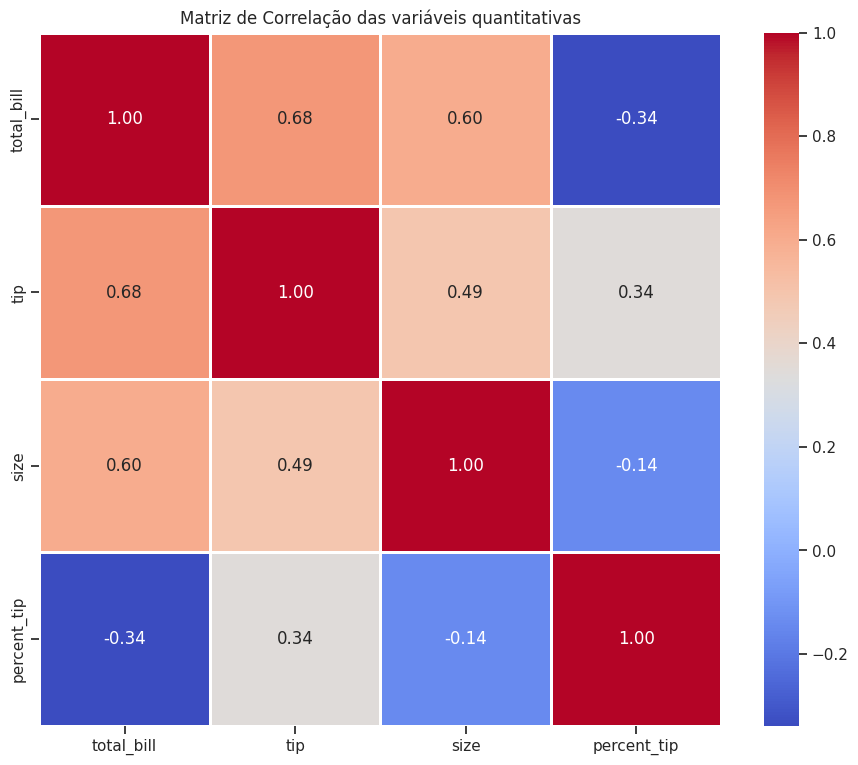

In [10]:
quanti_df = df.select_dtypes(include=['float', 'int']) #filtra as colunas numéricas

corr_matriz = quanti_df.corr() #cria matriz de correlação

sns.set(style="ticks")

# Cria um heatmap para a matriz de correlação
plt.figure(figsize=(11, 9)) #define tamanho do plot
heatmap = sns.heatmap(corr_matriz, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.9, linecolor='white') #configura os parâmetros para o heatmap
heatmap.set_title('Matriz de Correlação das variáveis quantitativas') #adiciona título
plt.show() #mostra o plot (desnecessário nesse ambiente)

## 3. Insights